In [2175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [2176]:
data_file = "conso.txt"

In [2177]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [2178]:
text='test'
filename='text.txt'
#save_text(filename)

In [2179]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [2180]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


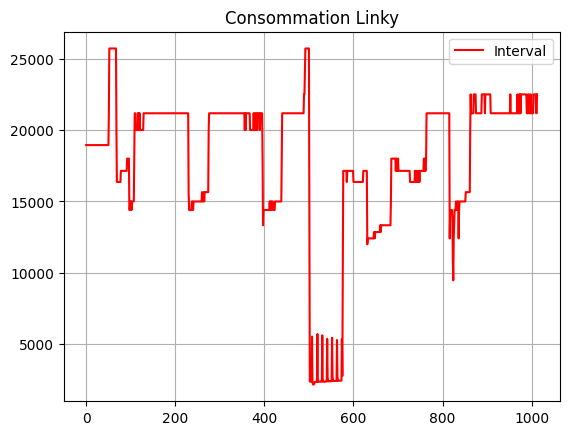

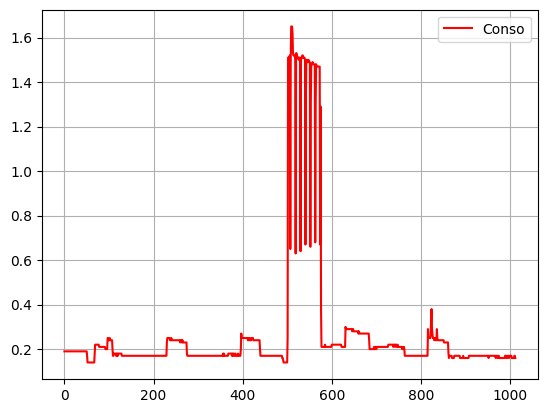

In [2181]:

plt.title('Consommation Linky')
plt.plot(data['interval'], color='red',label='Interval')
plt.grid()
plt.legend()
plt.show()
plt.plot(data['Conso'], color='red',label='Conso')
plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [2182]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [2183]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167655 entries, 0 to 167654
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  167655 non-null  int64  
 1   kWh       167655 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.6 MB


In [2184]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
167650,26867,0.13
167651,26077,0.14
167652,26285,0.14
167653,26978,0.13


<Axes: >

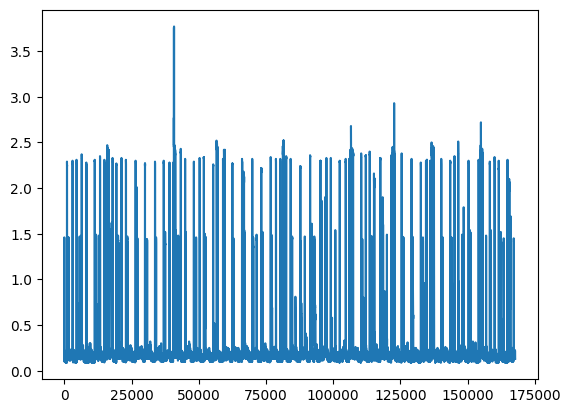

In [2185]:
conso_data['kWh'].plot()

In [2186]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
167650,26867,0.13,26.867,133.993375,3965761958
167651,26077,0.14,26.077,138.052690,3965788035
167652,26285,0.14,26.285,136.960243,3965814320
167653,26978,0.13,26.978,133.442064,3965841298


In [2187]:
# index dernier echantillon
l=len(conso_data)-1
l

167654

In [2188]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

3965868263000

In [2189]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 47, 16, 85310)

In [2190]:
old

False

In [2191]:
if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)

conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167655 entries, 0 to 167654
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   167655 non-null  int64         
 1   kWh        167655 non-null  float64       
 2   sec        167655 non-null  float64       
 3   Wh         167655 non-null  float64       
 4   cumul(ms)  167655 non-null  int64         
 5   dates      167655 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 7.7 MB


In [2192]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:47:42.374310,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:48:08.617310,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:48:34.502310,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:49:00.256310,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:49:26.030310,07/03/2024
...,...,...,...,...,...,...,...
167650,26867,0.13,26.867,133.993375,3965761958,2024-04-21 23:23:18.043310,21/04/2024
167651,26077,0.14,26.077,138.052690,3965788035,2024-04-21 23:23:44.120310,21/04/2024
167652,26285,0.14,26.285,136.960243,3965814320,2024-04-21 23:24:10.405310,21/04/2024
167653,26978,0.13,26.978,133.442064,3965841298,2024-04-21 23:24:37.383310,21/04/2024


In [2193]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:47:42.374310   
 
          days  
 0  07/03/2024  ,
         Interval   kWh     sec          Wh   cumul(ms)  \
 167654     26965  0.13  26.965  133.506397  3965868263   
 
                             dates        days  
 167654 2024-04-21 23:25:04.348310  21/04/2024  )

In [2194]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('21/04/2024', 4, 2024)

In [2195]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
163960,37671,0.09,37.671,95.564227,3881567888,2024-04-21 00:00:03.973310,21/04/2024
163961,37460,0.10,37.460,96.102509,3881605348,2024-04-21 00:00:41.433310,21/04/2024
163962,34317,0.10,34.317,104.904275,3881639665,2024-04-21 00:01:15.750310,21/04/2024
163963,35324,0.10,35.324,101.913713,3881674989,2024-04-21 00:01:51.074310,21/04/2024
163964,36496,0.10,36.496,98.640947,3881711485,2024-04-21 00:02:27.570310,21/04/2024
...,...,...,...,...,...,...,...
167650,26867,0.13,26.867,133.993375,3965761958,2024-04-21 23:23:18.043310,21/04/2024
167651,26077,0.14,26.077,138.052690,3965788035,2024-04-21 23:23:44.120310,21/04/2024
167652,26285,0.14,26.285,136.960243,3965814320,2024-04-21 23:24:10.405310,21/04/2024
167653,26978,0.13,26.978,133.442064,3965841298,2024-04-21 23:24:37.383310,21/04/2024


In [2196]:
day

'21/04/2024'

In [2197]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:47:42.374310,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:48:08.617310,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:48:34.502310,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:49:00.256310,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:49:26.030310,07/03/2024
...,...,...,...,...,...,...,...
167650,26867,0.13,26.867,133.993375,3965761958,2024-04-21 23:23:18.043310,21/04/2024
167651,26077,0.14,26.077,138.052690,3965788035,2024-04-21 23:23:44.120310,21/04/2024
167652,26285,0.14,26.285,136.960243,3965814320,2024-04-21 23:24:10.405310,21/04/2024
167653,26978,0.13,26.978,133.442064,3965841298,2024-04-21 23:24:37.383310,21/04/2024


In [2198]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [2199]:
# count elements in each group => conso in watts => convert to kW
(grouped.count()/1000)

,kWh
days,
07/03/2024,3.142
08/03/2024,3.751
09/03/2024,3.082
10/03/2024,3.534
11/03/2024,4.545
12/03/2024,3.552
13/03/2024,3.539
14/03/2024,3.656
15/03/2024,3.563


In [2200]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean


kWh    0.321101
dtype: float64

In [2201]:
# mean by day from 07/03
mean=(grouped.count()/1000).mean()
mean

kWh    3.644674
dtype: float64

In [2202]:
filename='conso_par_jour.csv'
df_grp = grouped.count()/1000
df_grp.to_csv(filename)
filename='../conso_par_jour.csv'
df_grp.to_csv(filename)

In [2203]:
df_grp

,kWh
days,
07/03/2024,3.142
08/03/2024,3.751
09/03/2024,3.082
10/03/2024,3.534
11/03/2024,4.545
12/03/2024,3.552
13/03/2024,3.539
14/03/2024,3.656
15/03/2024,3.563


In [2204]:
#manuel
#day = '11/03/2024'


In [2205]:
# conso day
conso_day = conso_data[conso_data['days']==day]
len(conso_day)

3695

In [2206]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
163960,37671,0.09,37.671,95.564227,3881567888,2024-04-21 00:00:03.973310,21/04/2024
163961,37460,0.10,37.460,96.102509,3881605348,2024-04-21 00:00:41.433310,21/04/2024
163962,34317,0.10,34.317,104.904275,3881639665,2024-04-21 00:01:15.750310,21/04/2024
163963,35324,0.10,35.324,101.913713,3881674989,2024-04-21 00:01:51.074310,21/04/2024
163964,36496,0.10,36.496,98.640947,3881711485,2024-04-21 00:02:27.570310,21/04/2024
...,...,...,...,...,...,...,...
167650,26867,0.13,26.867,133.993375,3965761958,2024-04-21 23:23:18.043310,21/04/2024
167651,26077,0.14,26.077,138.052690,3965788035,2024-04-21 23:23:44.120310,21/04/2024
167652,26285,0.14,26.285,136.960243,3965814320,2024-04-21 23:24:10.405310,21/04/2024
167653,26978,0.13,26.978,133.442064,3965841298,2024-04-21 23:24:37.383310,21/04/2024


In [2207]:
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [2208]:
conso_day.head(1).dates, conso_day.tail(1).dates


(163960   2024-04-21 00:00:03.973310
 Name: dates, dtype: datetime64[ns],
 167654   2024-04-21 23:25:04.348310
 Name: dates, dtype: datetime64[ns])

In [2209]:
conso_day.loc[:,'dates']

163960   2024-04-21 00:00:03.973310
163961   2024-04-21 00:00:41.433310
163962   2024-04-21 00:01:15.750310
163963   2024-04-21 00:01:51.074310
163964   2024-04-21 00:02:27.570310
                    ...            
167650   2024-04-21 23:23:18.043310
167651   2024-04-21 23:23:44.120310
167652   2024-04-21 23:24:10.405310
167653   2024-04-21 23:24:37.383310
167654   2024-04-21 23:25:04.348310
Name: dates, Length: 3695, dtype: datetime64[ns]

In [2210]:
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_26500\2932063292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:3,37671,0.09,37.671,95.564227,3881567888,2024-04-21 00:00:03.973310,21/04/2024
0:0:41,37460,0.10,37.460,96.102509,3881605348,2024-04-21 00:00:41.433310,21/04/2024
0:1:15,34317,0.10,34.317,104.904275,3881639665,2024-04-21 00:01:15.750310,21/04/2024
0:1:51,35324,0.10,35.324,101.913713,3881674989,2024-04-21 00:01:51.074310,21/04/2024
0:2:27,36496,0.10,36.496,98.640947,3881711485,2024-04-21 00:02:27.570310,21/04/2024
...,...,...,...,...,...,...,...
23:23:18,26867,0.13,26.867,133.993375,3965761958,2024-04-21 23:23:18.043310,21/04/2024
23:23:44,26077,0.14,26.077,138.052690,3965788035,2024-04-21 23:23:44.120310,21/04/2024
23:24:10,26285,0.14,26.285,136.960243,3965814320,2024-04-21 23:24:10.405310,21/04/2024


In [2211]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('23:25:06', 3.695)

In [2212]:
conso_jour=len(df['kWh'])

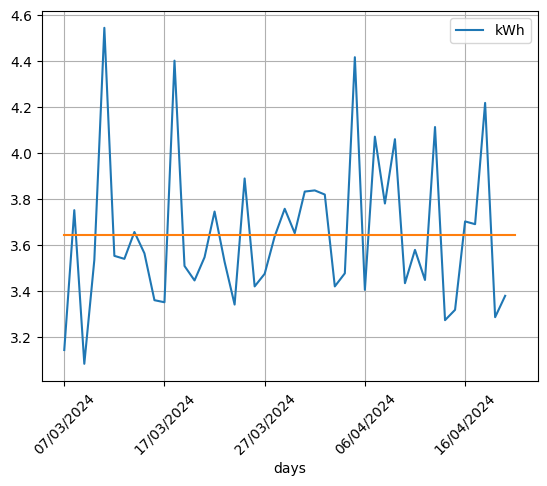

In [2213]:
df_grp.iloc[:-1].plot()#kind='bar')
plt.plot((0,len(df_grp)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


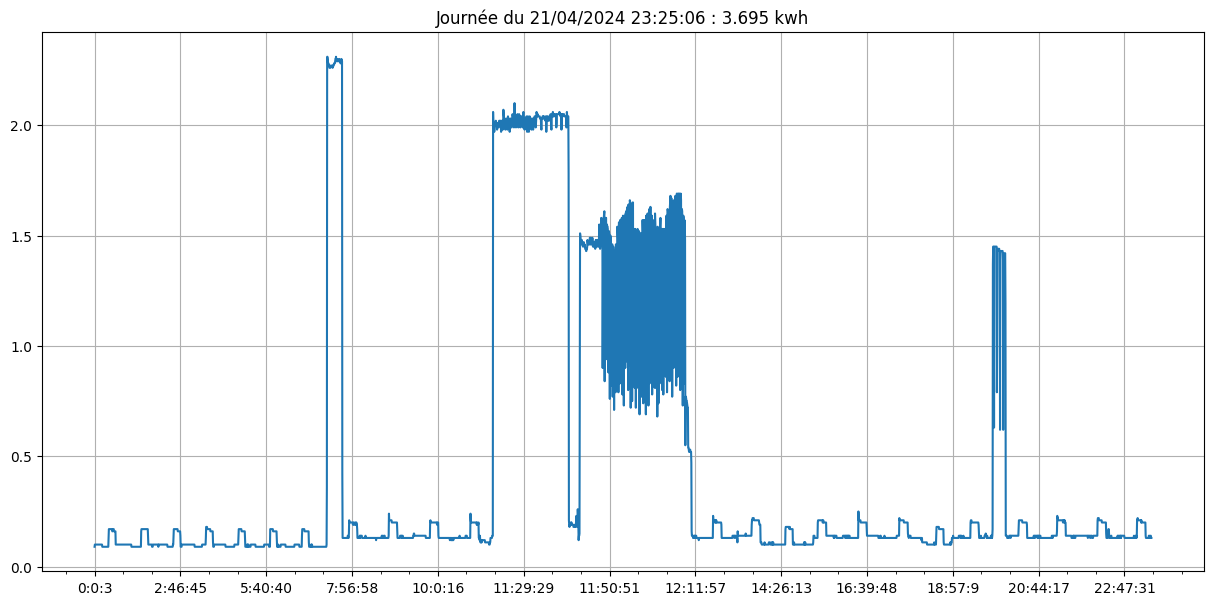

In [2214]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [2215]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]

In [2216]:
df['power']

heure
0:0:3       0.09
0:0:41      0.10
0:1:15      0.10
0:1:51      0.10
0:2:27      0.10
            ... 
23:23:18    0.13
23:23:44    0.14
23:24:10    0.14
23:24:37    0.13
23:25:4     0.13
Name: power, Length: 3695, dtype: float64

<Axes: xlabel='heure'>

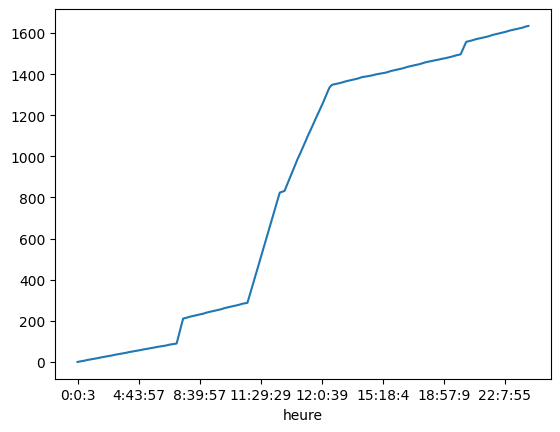

In [2217]:
evo=df['power'].cumsum()
evo.plot()

753

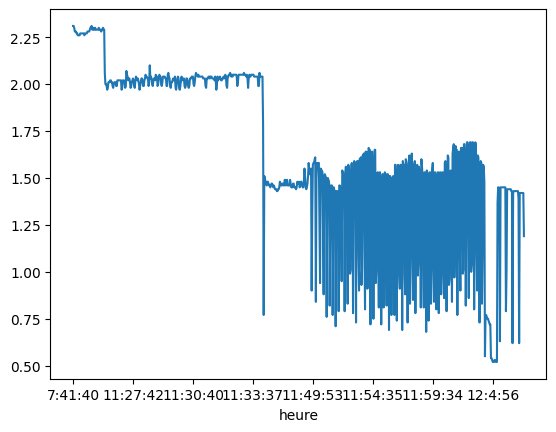

In [2218]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

2105

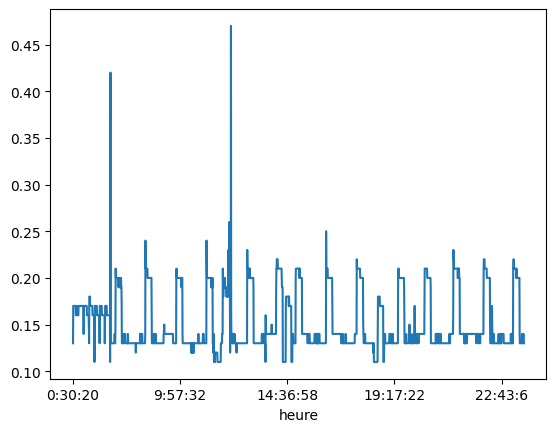

In [2219]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

2942

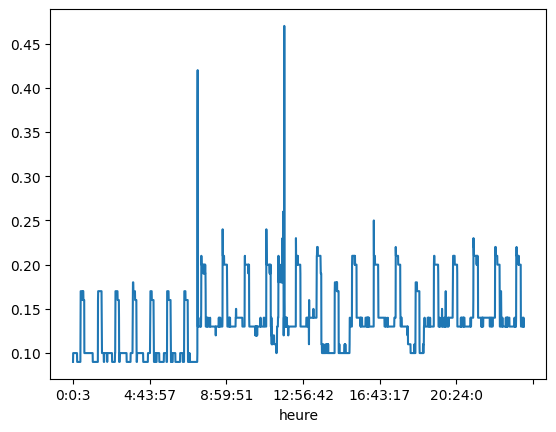

In [2220]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [2221]:
time = conso_data['dates']
time


0        2024-03-07 01:47:42.374310
1        2024-03-07 01:48:08.617310
2        2024-03-07 01:48:34.502310
3        2024-03-07 01:49:00.256310
4        2024-03-07 01:49:26.030310
                    ...            
167650   2024-04-21 23:23:18.043310
167651   2024-04-21 23:23:44.120310
167652   2024-04-21 23:24:10.405310
167653   2024-04-21 23:24:37.383310
167654   2024-04-21 23:25:04.348310
Name: dates, Length: 167655, dtype: datetime64[ns]

In [2222]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [2223]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [2224]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

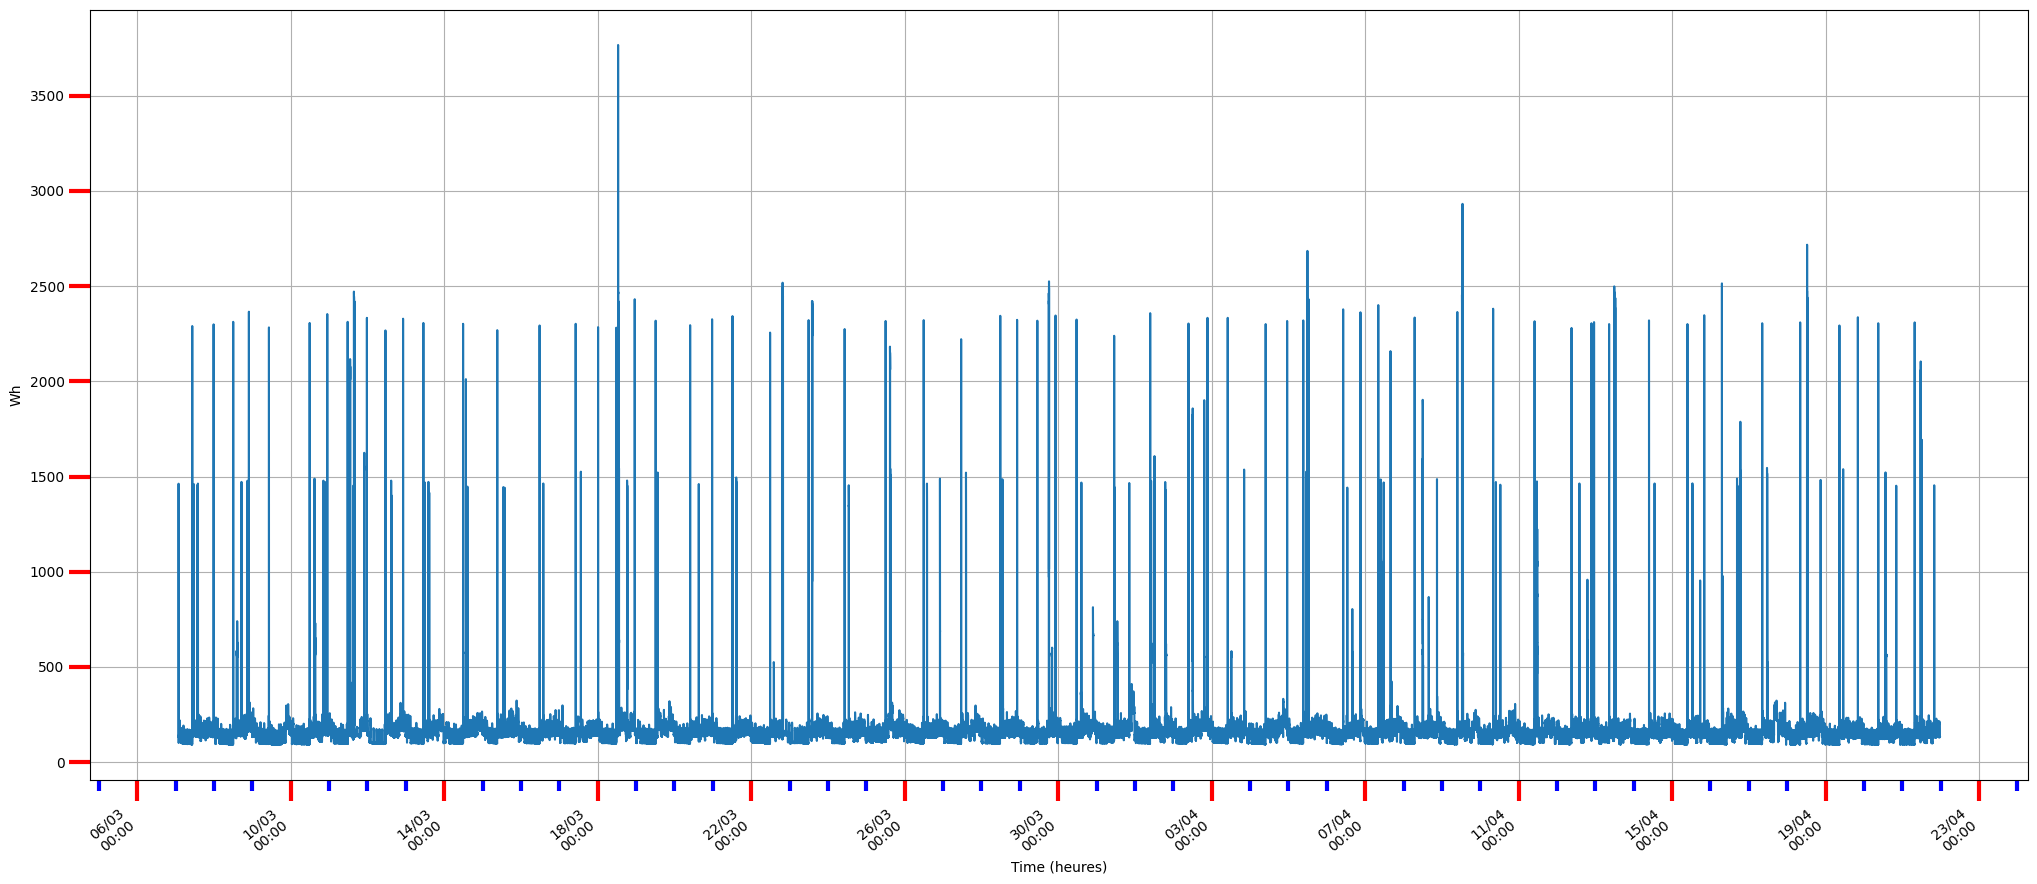

In [2225]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [2226]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
167654,26965,0.13,26.965,133.506397,3965868263,2024-04-21 23:25:04.348310,21/04/2024


In [2227]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

3965868263000

# Slice of last 1 kWh

In [2228]:
l = len(conso_data)  # total watt consommés
l

167655

In [2229]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(167655, 1000)

In [2230]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [2231]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec          Wh   cumul(ms)  \
 166655     18116  0.20  18.116  198.719364  3941450434   
 166656     18215  0.20  18.215  197.639308  3941468649   
 166657     18091  0.20  18.091  198.993975  3941486740   
 166658     18209  0.20  18.209  197.704432  3941504949   
 166659     21212  0.17  21.212  169.715256  3941526161   
 ...          ...   ...     ...         ...         ...   
 167650     26867  0.13  26.867  133.993375  3965761958   
 167651     26077  0.14  26.077  138.052690  3965788035   
 167652     26285  0.14  26.285  136.960243  3965814320   
 167653     26978  0.13  26.978  133.442064  3965841298   
 167654     26965  0.13  26.965  133.506397  3965868263   
 
                             dates        days  
 166655 2024-04-21 16:38:06.519310  21/04/2024  
 166656 2024-04-21 16:38:24.734310  21/04/2024  
 166657 2024-04-21 16:38:42.825310  21/04/2024  
 166658 2024-04-21 16:39:01.034310  21/04/2024  
 166659 2024-04-21 16:39:22.246310  21

In [2232]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [2233]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [2234]:
cumtime_end,cumtime_start

(3965868263000, 3941468649000)

In [2235]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

24399614000

In [2236]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 21, 23, 25, 13, 199786),
 datetime.datetime(2024, 4, 21, 16, 38, 33, 585786),
 '21/04/2024 23:25:04')

In [2237]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:47:42.374310,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:48:08.617310,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:48:34.502310,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:49:00.256310,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:49:26.030310,07/03/2024
...,...,...,...,...,...,...,...
167650,26867,0.13,26.867,133.993375,3965761958,2024-04-21 23:23:18.043310,21/04/2024
167651,26077,0.14,26.077,138.052690,3965788035,2024-04-21 23:23:44.120310,21/04/2024
167652,26285,0.14,26.285,136.960243,3965814320,2024-04-21 23:24:10.405310,21/04/2024
167653,26978,0.13,26.978,133.442064,3965841298,2024-04-21 23:24:37.383310,21/04/2024


In [2238]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('21/04/2024 16:38:24', '21/04/2024 23:25:04')

In [2239]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-21 16:38:06.519310', '2024-04-21 23:25:04.348310')

In [2240]:
k

1

In [2241]:
data.Interval.tail(1000)

166655    18116
166656    18215
166657    18091
166658    18209
166659    21212
          ...  
167650    26867
167651    26077
167652    26285
167653    26978
167654    26965
Name: Interval, Length: 1000, dtype: int64

In [2242]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(6.787762500000001, 3.5357748595358185, 6, 47, 15)

In [2243]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_26500\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [2244]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
166655,18116,0.20,18.116,198.719364,3941450434,2024-04-21 16:38:06.519310,21/04/2024,2024-04-21 16:38:06.519310
166656,18215,0.20,18.215,197.639308,3941468649,2024-04-21 16:38:24.734310,21/04/2024,2024-04-21 16:38:24.734310
166657,18091,0.20,18.091,198.993975,3941486740,2024-04-21 16:38:42.825310,21/04/2024,2024-04-21 16:38:42.825310
166658,18209,0.20,18.209,197.704432,3941504949,2024-04-21 16:39:01.034310,21/04/2024,2024-04-21 16:39:01.034310
166659,21212,0.17,21.212,169.715256,3941526161,2024-04-21 16:39:22.246310,21/04/2024,2024-04-21 16:39:22.246310
...,...,...,...,...,...,...,...,...
167650,26867,0.13,26.867,133.993375,3965761958,2024-04-21 23:23:18.043310,21/04/2024,2024-04-21 23:23:18.043310
167651,26077,0.14,26.077,138.052690,3965788035,2024-04-21 23:23:44.120310,21/04/2024,2024-04-21 23:23:44.120310
167652,26285,0.14,26.285,136.960243,3965814320,2024-04-21 23:24:10.405310,21/04/2024,2024-04-21 23:24:10.405310
167653,26978,0.13,26.978,133.442064,3965841298,2024-04-21 23:24:37.383310,21/04/2024,2024-04-21 23:24:37.383310


<Axes: >

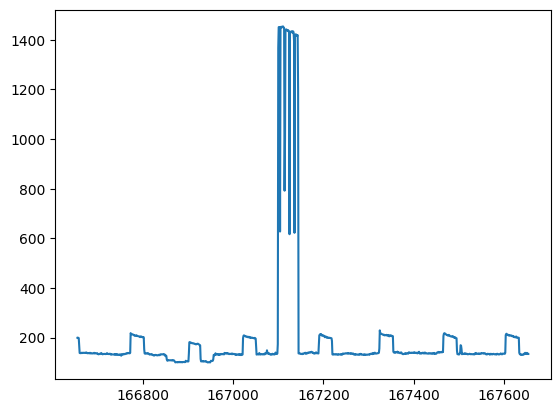

In [2245]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [2246]:
data['Wh']

166655    198.719364
166656    197.639308
166657    198.993975
166658    197.704432
166659    169.715256
             ...    
167650    133.993375
167651    138.052690
167652    136.960243
167653    133.442064
167654    133.506397
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

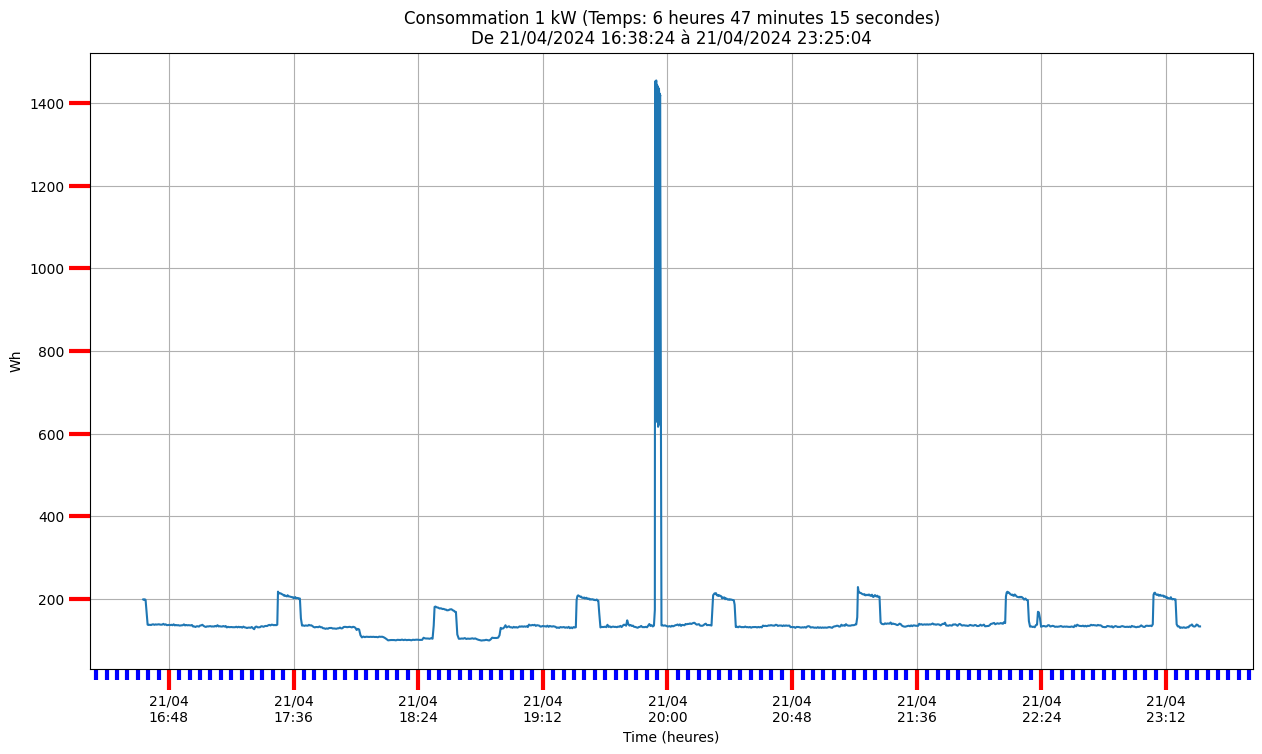

In [2247]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

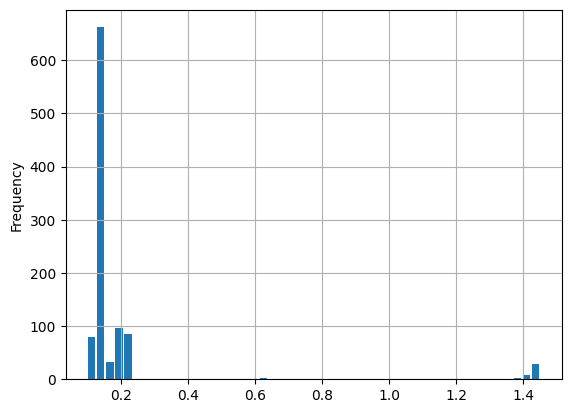

In [2248]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [2249]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
167650,26867,0.13,26.867,133.993375,3965761958,2024-04-21 23:23:18.043310,21/04/2024
167651,26077,0.14,26.077,138.052690,3965788035,2024-04-21 23:23:44.120310,21/04/2024
167652,26285,0.14,26.285,136.960243,3965814320,2024-04-21 23:24:10.405310,21/04/2024
167653,26978,0.13,26.978,133.442064,3965841298,2024-04-21 23:24:37.383310,21/04/2024
167654,26965,0.13,26.965,133.506397,3965868263,2024-04-21 23:25:04.348310,21/04/2024


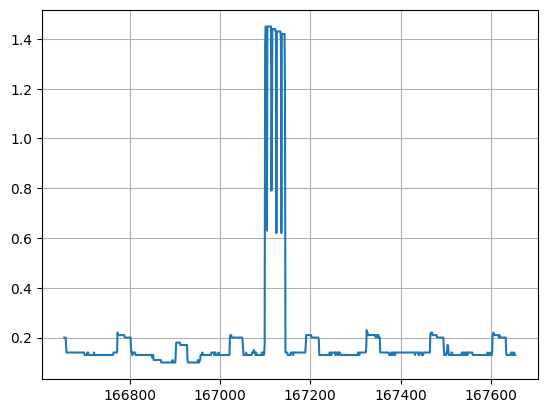

In [2250]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [2251]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(3965868263000.0, 66097.80438333334)

In [2252]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 21, 23, 25, 16, 662279),
 datetime.datetime(2024, 3, 7, 1, 47, 28, 399279))

In [2253]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(167655, 3965869, 1101.6302777777778)

In [2254]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [2255]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [2256]:
732/12 # 60 jours

61.0

In [2257]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

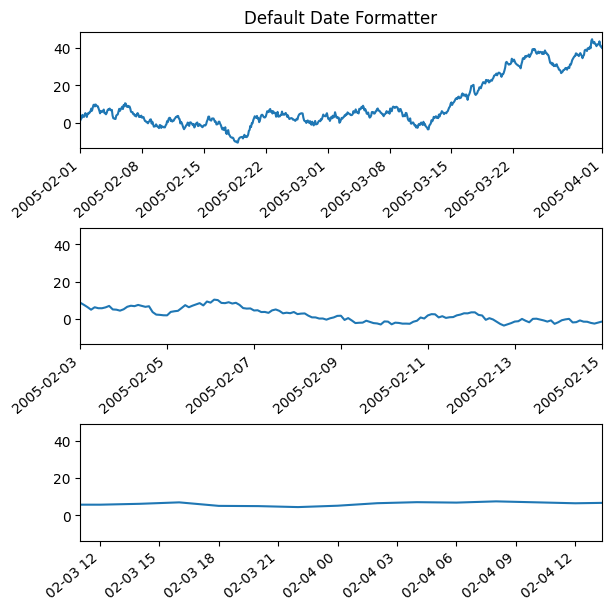

In [2258]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [2259]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)